In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('/eai/project/code')

In [3]:
import re
import numpy as np
import scipy.misc
import os
import lorem

from PIL import Image, ImageDraw, ImageFont

In [4]:
from miscc.utils import save_images_with_text

In [5]:
def make_caption(): 
    sent = "%s %s %s" % (lorem.sentence(), lorem.sentence(), lorem.sentence())
    sent = sent.replace(".", "")
    return sent

In [6]:
img = np.uint8(255 * np.ones((256, 256, 3)))
real_img = Image.fromarray(img)
d = ImageDraw.Draw(real_img)
d.ellipse((80, 80, 180, 180), fill = 'blue', outline ='blue')

img_with_dot = np.asarray(real_img)

In [7]:
batch_size = 16
num_samples = 8
imgs64, imgs128, imgs256 = [], [], []


for n in range(batch_size):  
    imgs64.append(np.random.random((num_samples, 64, 64, 3)))
    imgs128.append(np.random.random((num_samples, 128, 128, 3)))
    imgs256.append(np.random.random((num_samples, 256, 256, 3)))

texts_batch = [make_caption() for x in range(batch_size)]
real_batch = [img_with_dot for x in range(batch_size)]

In [8]:
imgs = save_images_with_text(
    lr_sample_batchs = imgs64, 
    hr_sample_batchs = imgs128, 
    sr_sample_batchs=imgs256, 
    reals_batch = real_batch,
    texts_batch=texts_batch,
    batch_size=batch_size, 
    startID=0,
    max_len = 15,
    save_dir=None)

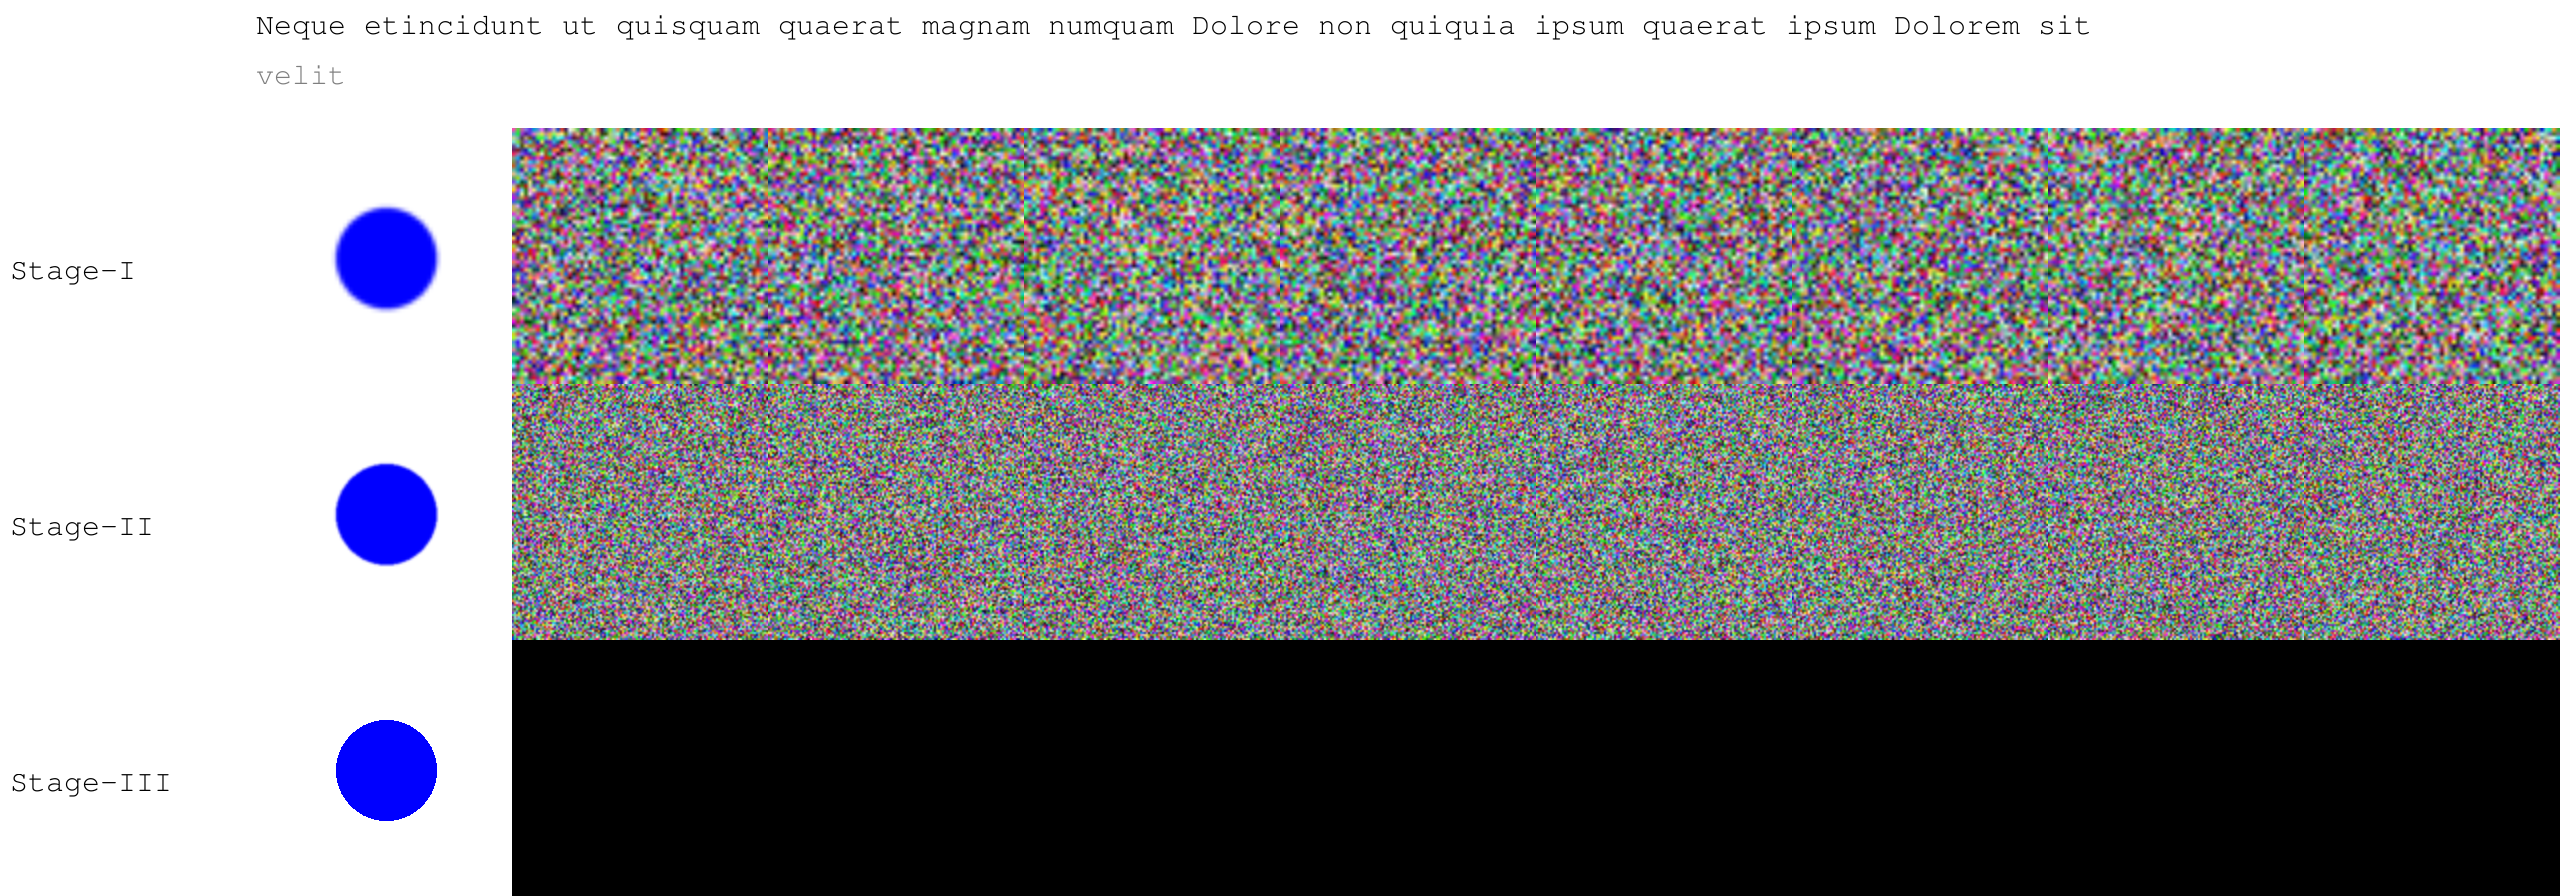

In [9]:
imgs[-1]